In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('./project/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [5]:
df[df.Age.isnull()].groupby('Survived').size()

Survived
0    125
1     52
dtype: int64

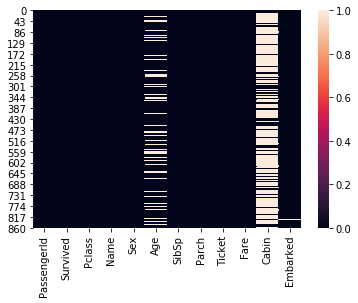

In [6]:
sns.heatmap(df.isnull())

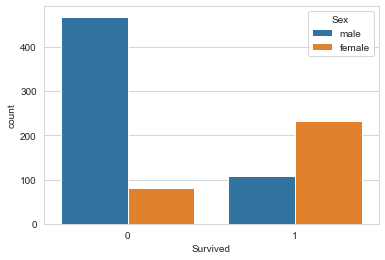

In [7]:
sns.set_style('whitegrid')
sns.countplot(x=df.Survived, hue=df.Sex)

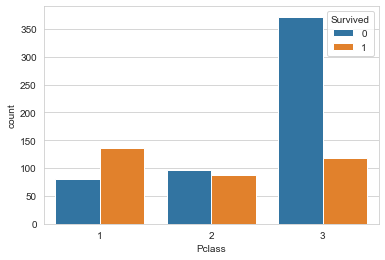

In [8]:
sns.set_style('whitegrid')
sns.countplot(x=df.Pclass, hue=df.Survived)

In [9]:
df[(df.Sex=='male')&(df.Survived==1)].size/df.size

0.122334455667789

In [10]:
df[(df.Pclass==3)&(df.Survived==1)].size/df.size

0.1335578002244669

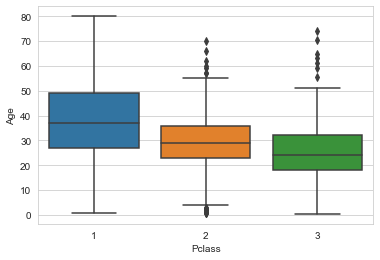

In [11]:
sns.boxplot(x=df.Pclass, y=df.Age)

In [12]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
"""
ages = []
for i in zip(df['Pclass'],df['Age']):
    age = i[1]
    pc = i[0]

    if str(age) == 'nan':
        if pc==1:
            ages.append(38)
        elif pc==2:
            ages.append(29)
        else:
            ages.append(25)
    else:
        ages.append(age)
        
df['Age'] = ages
"""

"\nages = []\nfor i in zip(df['Pclass'],df['Age']):\n    age = i[1]\n    pc = i[0]\n\n    if str(age) == 'nan':\n        if pc==1:\n            ages.append(38)\n        elif pc==2:\n            ages.append(29)\n        else:\n            ages.append(25)\n    else:\n        ages.append(age)\n        \ndf['Age'] = ages\n"

In [14]:
#Age Column의 null값 처리
age_mean = df.groupby('Pclass').Age.mean()
age_mean.loc[1]

age = []
for a,p in df[['Age', 'Pclass']].values:
    if not(a >0):
        age.append(age_mean.loc[p])
    else:
        age.append(a)
age
df['nAge'] = age
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,nAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,27.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,19.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,25.14062
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,26.00000


In [15]:
from sklearn.linear_model import LogisticRegression
y= df.Survived
x = df[['Pclass', 'nAge', 'SibSp', 'Parch', 'Embarked', 'Sex']]
x

,Pclass,nAge,SibSp,Parch,Embarked,Sex
0,3,22.00000,1,0,S,male
1,1,38.00000,1,0,C,female
2,3,26.00000,0,0,S,female
3,1,35.00000,1,0,S,female
4,3,35.00000,0,0,S,male
...,...,...,...,...,...,...
886,2,27.00000,0,0,S,male
887,1,19.00000,0,0,S,female
888,3,25.14062,1,2,S,female
889,1,26.00000,0,0,C,male


In [16]:
pd.get_dummies(x).head()

,Pclass,nAge,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,22.0,1,0,0,0,1,0,1
1,1,38.0,1,0,1,0,0,1,0
2,3,26.0,0,0,0,0,1,1,0
3,1,35.0,1,0,0,0,1,1,0
4,3,35.0,0,0,0,0,1,0,1


In [17]:
x = pd.get_dummies(x, drop_first=True)
x

,Pclass,nAge,SibSp,Parch,Embarked_Q,Embarked_S,Sex_male
0,3,22.00000,1,0,0,1,1
1,1,38.00000,1,0,0,0,0
2,3,26.00000,0,0,0,1,0
3,1,35.00000,1,0,0,1,0
4,3,35.00000,0,0,0,1,1
...,...,...,...,...,...,...,...
886,2,27.00000,0,0,0,1,1
887,1,19.00000,0,0,0,1,0
888,3,25.14062,1,2,0,1,0
889,1,26.00000,0,0,0,0,1


In [18]:
print(x.shape)
print(y.shape)

(891, 7)
(891,)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 777, shuffle=True)

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# 모델평가하기 np.mean(y_test == y_pred)
y_pred = log.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8100558659217877


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[101,  16],
       [ 18,  44]], dtype=int64)

In [23]:
classification_report(y_test, y_pred) 

'              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.86       117\n           1       0.73      0.71      0.72        62\n\n    accuracy                           0.81       179\n   macro avg       0.79      0.79      0.79       179\nweighted avg       0.81      0.81      0.81       179\n'

In [24]:
#model 저장하기
import pickle
filename = 'log_titanic_model.sav'
pickle.dump(log, open(filename, 'wb'))
## 다시 읽어오기
new_log = pickle.load(open(filename, 'rb'))
accuracy_score(y_test, new_log.predict(x_test))


0.8100558659217877

In [25]:
df = pd.read_csv('./project/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [28]:
df['hour'] = df.Timestamp.apply(lambda x: x[5:7])

In [29]:
df = pd.get_dummies(df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'hour', 'Clicked on Ad']])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07
0,68.95,35,61833.90,256.09,0,0,0,0,1,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,0,1,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,1,0,0,0,0
3,74.15,29,54806.18,245.89,1,0,1,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,0,1,0


In [30]:
x = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad'] 
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07
0,68.95,35,61833.90,256.09,0,0,0,1,0,0,0,0
1,80.23,31,68441.85,193.77,1,0,0,0,1,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,1,0,0,0,0
3,74.15,29,54806.18,245.89,1,1,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,0,1,0,0,0,0,0
996,51.30,45,67782.17,134.42,1,0,0,0,1,0,0,0
997,51.63,51,42415.72,120.37,1,0,1,0,0,0,0,0
998,55.55,19,41920.79,187.95,0,0,0,1,0,0,0,0


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
lr = LogisticRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       130
           1       0.96      0.92      0.94       120

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



C:\Users\103-04\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad'] 
x
x_train, x_test, y_train, y_test = train_test_split(x, y)
lr = LogisticRegression()
lr.fit(x_train, y_train)

predictions = lr.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       127
           1       0.91      0.83      0.87       123

    accuracy                           0.88       250
   macro avg       0.88      0.88      0.88       250
weighted avg       0.88      0.88      0.88       250

